<a href="https://colab.research.google.com/github/SRIKARREDDY-dotorg/new_repository/blob/master/keras_tensorflow_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.3.0


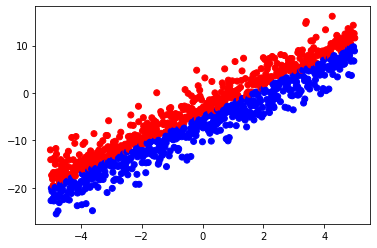

In [2]:
 X=np.array(np.linspace(-5,5,1000))
 X=np.array([[x,3*x-5+3*np.random.randn()] for x in X])
 Y=X[:,-1]>3*X[:,0]-5
 Y=np.array([int(y) for y in Y])
 cols=['b','r','g','m','c']
 c=[cols[int(i)] for i in Y]
 plt.scatter(X[:,0],X[:,1],color=c)
 plt.show()

In [3]:
model_1=keras.Sequential([
                          keras.layers.Dense(20,input_shape=(2,),activation='tanh'),
                          keras.layers.Dense(1,activation='tanh')
])
model_1.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError(),metrics=['accuracy'])
hist=model_1.fit(X,Y,epochs=1000,verbose=1)

Epoch 1/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.8619 - accuracy: 0.4760
Epoch 2/1000
32/32 [==============================] - 0s 941us/step - loss: 0.4594 - accuracy: 0.5520
Epoch 3/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3448 - accuracy: 0.5130
Epoch 4/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3086 - accuracy: 0.5270
Epoch 5/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.2753 - accuracy: 0.5490
Epoch 6/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.2443 - accuracy: 0.5700
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.2144 - accuracy: 0.6020
Epoch 8/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.1849 - accuracy: 0.6640
Epoch 9/1000
32/32 [==============================] - 0s 963us/step - loss: 0.1607 - accuracy: 0.7610
Epoch 10/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.1428 - accuracy: 0.

,loss,accuracy
995,0.020505,0.990
996,0.020212,0.988
997,0.020410,0.989
998,0.020648,0.990
999,0.020539,0.988


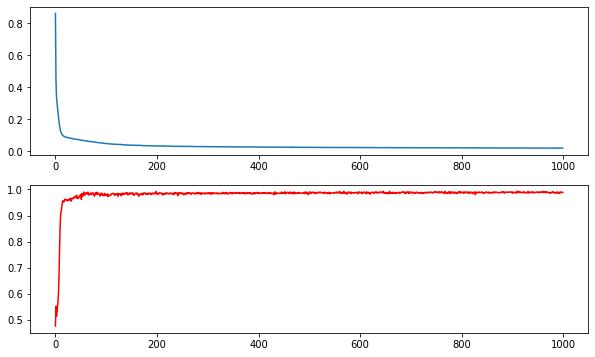

In [4]:
import pandas as pd
loss=hist.history['loss']
acc=hist.history['accuracy']
ax=plt.figure(figsize=(10,6))
p=ax.add_subplot(211)
p.plot(loss)
p=ax.add_subplot(212)
p.plot(acc,color='r')
df=pd.DataFrame(hist.history)
df.tail()

In [5]:
test_loss,test_acc=model_1.evaluate(X,Y,verbose=2)
print("\nTest Accuracy: ",test_acc)

32/32 - 0s - loss: 0.0198 - accuracy: 0.9880

Test Accuracy:  0.9879999756813049


In [6]:
  x0_min=X[:,0].min()
  x0_max=X[:,0].max()
  x1_min=X[:,1].min()
  x1_max=X[:,1].max()
  print([x0_min,x0_max],np.round([x1_min,x1_max],2))
  plt.rcParams['figure.figsize']=(10,6)
  xx,yy=np.meshgrid(
      np.linspace(x0_min,x0_max,1000),
      np.linspace(x1_min,x1_max,1000))

[-5.0, 5.0] [-25.54  16.19]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'linewidhts'
  after removing the cwd from sys.path.


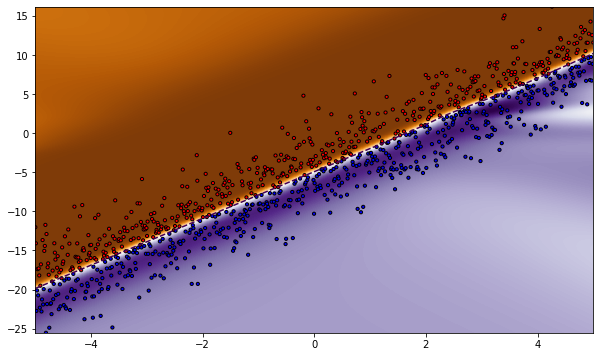

In [7]:
Z=model_1.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.imshow(Z,interpolation='nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),aspect='auto',origin='lower',cmap=plt.cm.PuOr_r)
contours=plt.contour(xx,yy,Z,levels=[0.5],linewidhts=4,linestyles='dashed')
cols=['b','r','g','m','c']
c=[cols[int(i)] for i in Y]
plt.scatter(X[:,0],X[:,1],s=10,c=c,cmap=plt.cm.PuBuGn_r,marker='o',edgecolors='k')
plt.axis([x0_min,x0_max,x1_min,x1_max])
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


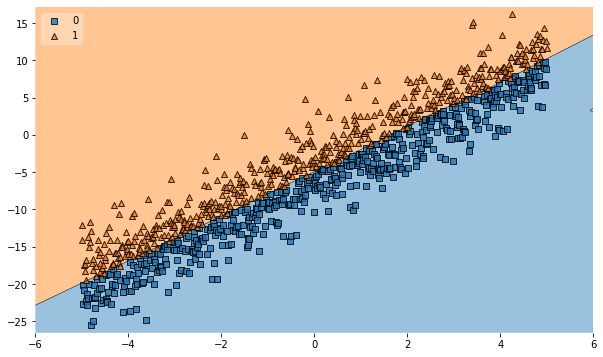

In [8]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y,clf=model_1,legend=2)
plt.show()

In [9]:
model_7=keras.Sequential([
                          keras.layers.Dense(20,input_shape=(2,),activation='relu'),
                          keras.layers.Dense(1,activation='tanh')
])
model_7.compile(optimizer='rmsprop',loss=tf.keras.losses.MeanSquaredError(),metrics=['accuracy'])
hist=model_7.fit(X,Y,epochs=1000,verbose=1)

Epoch 1/1000
32/32 [==============================] - 0s 978us/step - loss: 0.3530 - accuracy: 0.4250
Epoch 2/1000
32/32 [==============================] - 0s 932us/step - loss: 0.2913 - accuracy: 0.5380
Epoch 3/1000
32/32 [==============================] - 0s 922us/step - loss: 0.2573 - accuracy: 0.5830
Epoch 4/1000
32/32 [==============================] - 0s 970us/step - loss: 0.2297 - accuracy: 0.6150
Epoch 5/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.2051 - accuracy: 0.6560
Epoch 6/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.1869 - accuracy: 0.6930
Epoch 7/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.1704 - accuracy: 0.7270
Epoch 8/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.1583 - accuracy: 0.7580
Epoch 9/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.1457 - accuracy: 0.8050
Epoch 10/1000
32/32 [==============================] - 0s 972us/step - loss: 0.1372 - accura

,loss,accuracy
995,0.007137,0.989
996,0.005932,0.993
997,0.004403,0.998
998,0.007660,0.992
999,0.007254,0.993


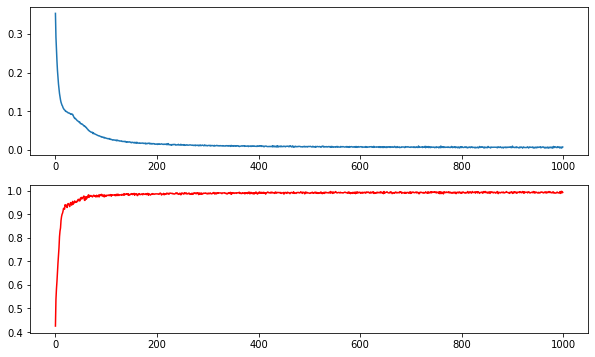

In [10]:
import pandas as pd
loss=hist.history['loss']
acc=hist.history['accuracy']
ax=plt.figure(figsize=(10,6))
p=ax.add_subplot(211)
p.plot(loss)
p=ax.add_subplot(212)
p.plot(acc,color='r')
df=pd.DataFrame(hist.history)
df.tail()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


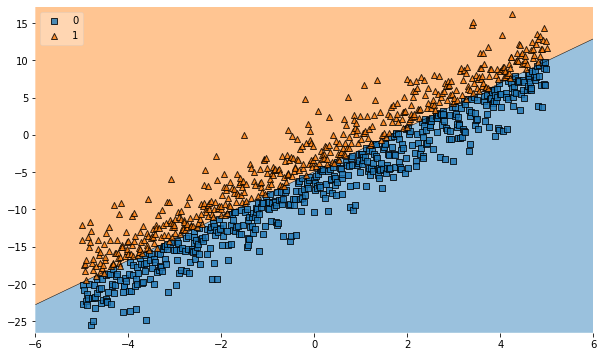

In [11]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y,clf=model_7,legend=2)
plt.show()

In [12]:
model_8=keras.Sequential([
                          keras.layers.Dense(14,input_shape=(2,),activation='relu'),
                          keras.layers.Dense(1,activation='tanh')
])
model_8.compile(optimizer='SGD',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
hist=model_8.fit(X,Y,epochs=1500,verbose=1)

Epoch 1/1500
32/32 [==============================] - 0s 920us/step - loss: 5.7697e-08 - accuracy: 0.5580
Epoch 2/1500
32/32 [==============================] - 0s 862us/step - loss: 5.7697e-08 - accuracy: 0.5580
Epoch 3/1500
32/32 [==============================] - 0s 855us/step - loss: 5.7697e-08 - accuracy: 0.5580
Epoch 4/1500
32/32 [==============================] - 0s 925us/step - loss: 5.7697e-08 - accuracy: 0.5580
Epoch 5/1500
32/32 [==============================] - 0s 930us/step - loss: 5.7697e-08 - accuracy: 0.5580
Epoch 6/1500
32/32 [==============================] - 0s 877us/step - loss: 5.7697e-08 - accuracy: 0.5580
Epoch 7/1500
32/32 [==============================] - 0s 859us/step - loss: 5.7697e-08 - accuracy: 0.5580
Epoch 8/1500
32/32 [==============================] - 0s 882us/step - loss: 5.7697e-08 - accuracy: 0.5580
Epoch 9/1500
32/32 [==============================] - 0s 864us/step - loss: 5.7697e-08 - accuracy: 0.5580
Epoch 10/1500
32/32 [=========================

,loss,accuracy
1495,5.769730e-08,0.558
1496,5.769730e-08,0.558
1497,5.769730e-08,0.558
1498,5.769730e-08,0.558
1499,5.769730e-08,0.558


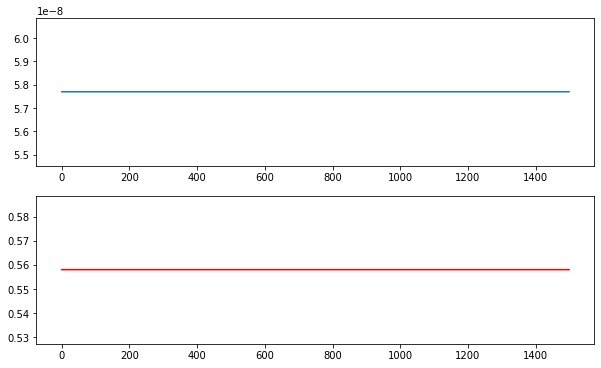

In [13]:
import pandas as pd
loss=hist.history['loss']
acc=hist.history['accuracy']
ax=plt.figure(figsize=(10,6))
p=ax.add_subplot(211)
p.plot(loss)
p=ax.add_subplot(212)
p.plot(acc,color='r')
df=pd.DataFrame(hist.history)
df.tail()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


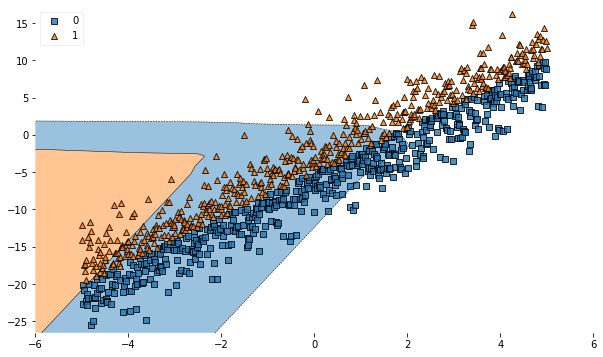

In [14]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y,clf=model_8,legend=2)
plt.show()

# **Non Linear Classfication with one output**

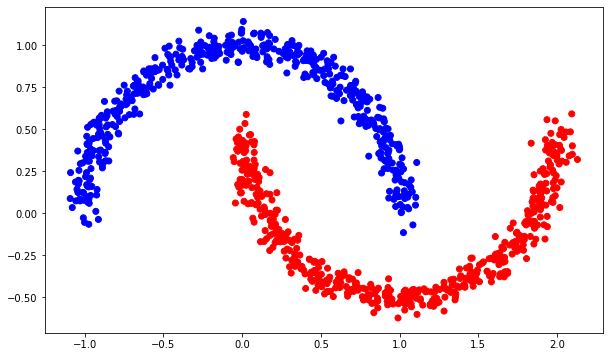

In [15]:
from sklearn import datasets
n_samples=1000
X,Y=datasets.make_moons(n_samples=n_samples,noise=0.05)
col=[cols[int(i)] for i in Y]
plt.scatter(X[:,0],X[:,1],color=col)
plt.show()

In [16]:
model_2=keras.Sequential([
                          keras.layers.Dense(10,input_shape=(2,),activation='tanh'),
                          keras.layers.Dense(1,activation='tanh')
])
model_2.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
hist=model_2.fit(X,Y,epochs=1000,verbose=1)

Epoch 1/1000
32/32 [==============================] - 0s 927us/step - loss: 0.6629 - accuracy: 0.6610
Epoch 2/1000
32/32 [==============================] - 0s 885us/step - loss: 0.5435 - accuracy: 0.6540
Epoch 3/1000
32/32 [==============================] - 0s 867us/step - loss: 0.4840 - accuracy: 0.6950
Epoch 4/1000
32/32 [==============================] - 0s 911us/step - loss: 0.4419 - accuracy: 0.7350
Epoch 5/1000
32/32 [==============================] - 0s 855us/step - loss: 0.4059 - accuracy: 0.7610
Epoch 6/1000
32/32 [==============================] - 0s 918us/step - loss: 0.3759 - accuracy: 0.7900
Epoch 7/1000
32/32 [==============================] - 0s 900us/step - loss: 0.3496 - accuracy: 0.8160
Epoch 8/1000
32/32 [==============================] - 0s 947us/step - loss: 0.3264 - accuracy: 0.8340
Epoch 9/1000
32/32 [==============================] - 0s 943us/step - loss: 0.3067 - accuracy: 0.8430
Epoch 10/1000
32/32 [==============================] - 0s 948us/step - loss: 0.290

,loss,accuracy
995,0.000236,1.0
996,0.000214,1.0
997,0.000181,1.0
998,0.000186,1.0
999,0.000214,1.0


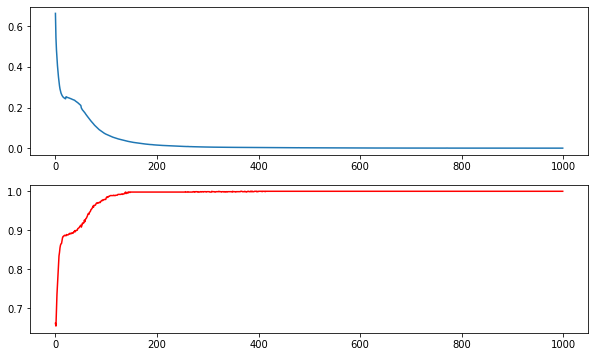

In [17]:
import pandas as pd
loss=hist.history['loss']
acc=hist.history['accuracy']
ax=plt.figure(figsize=(10,6))
p=ax.add_subplot(211)
p.plot(loss)
p=ax.add_subplot(212)
p.plot(acc,color='r')
df=pd.DataFrame(hist.history)
df.tail()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


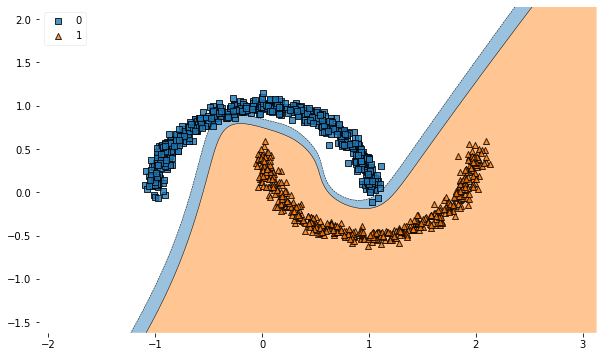

In [18]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y,clf=model_2,legend=2)
plt.show()

In [19]:
model_3=keras.Sequential([
                          keras.layers.Dense(10,input_shape=(2,),activation='tanh'),
                          keras.layers.Dense(1,activation='tanh')
])
model_3.compile(optimizer='rmsprop',loss=tf.keras.losses.MeanSquaredError(),metrics=['accuracy'])
hist=model_3.fit(X,Y,epochs=1000,verbose=1)

Epoch 1/1000
32/32 [==============================] - 0s 884us/step - loss: 1.1404 - accuracy: 0.2010
Epoch 2/1000
32/32 [==============================] - 0s 864us/step - loss: 0.7715 - accuracy: 0.1910
Epoch 3/1000
32/32 [==============================] - 0s 835us/step - loss: 0.4917 - accuracy: 0.2170
Epoch 4/1000
32/32 [==============================] - 0s 811us/step - loss: 0.3143 - accuracy: 0.2620
Epoch 5/1000
32/32 [==============================] - 0s 845us/step - loss: 0.2202 - accuracy: 0.5290
Epoch 6/1000
32/32 [==============================] - 0s 991us/step - loss: 0.1701 - accuracy: 0.7010
Epoch 7/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.1456 - accuracy: 0.7540
Epoch 8/1000
32/32 [==============================] - 0s 935us/step - loss: 0.1277 - accuracy: 0.7970
Epoch 9/1000
32/32 [==============================] - 0s 873us/step - loss: 0.1133 - accuracy: 0.8300
Epoch 10/1000
32/32 [==============================] - 0s 864us/step - loss: 0.1027 

,loss,accuracy
995,0.005572,1.0
996,0.005618,1.0
997,0.005549,1.0
998,0.005592,1.0
999,0.005616,1.0


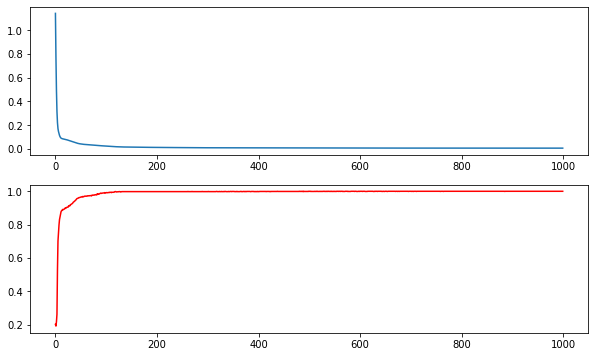

In [20]:
import pandas as pd
loss=hist.history['loss']
acc=hist.history['accuracy']
ax=plt.figure(figsize=(10,6))
p=ax.add_subplot(211)
p.plot(loss)
p=ax.add_subplot(212)
p.plot(acc,color='r')
df=pd.DataFrame(hist.history)
df.tail()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


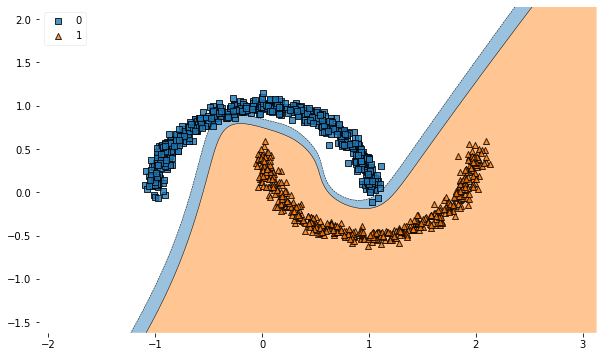

In [21]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y,clf=model_2,legend=2)
plt.show()

In [22]:
model_9=keras.Sequential([
                          keras.layers.Dense(10,input_shape=(2,),activation='relu'),
                          keras.layers.Dense(8,activation='relu'),
                          keras.layers.Dense(1,activation='tanh')
])
model_9.compile(optimizer='rmsprop',loss=tf.keras.losses.MeanSquaredError(),metrics=['accuracy'])
hist=model_9.fit(X,Y,epochs=1000,verbose=1)

Epoch 1/1000
32/32 [==============================] - 0s 966us/step - loss: 0.5401 - accuracy: 0.5000
Epoch 2/1000
32/32 [==============================] - 0s 914us/step - loss: 0.2838 - accuracy: 0.5790
Epoch 3/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.2001 - accuracy: 0.6760
Epoch 4/1000
32/32 [==============================] - 0s 917us/step - loss: 0.1683 - accuracy: 0.7260
Epoch 5/1000
32/32 [==============================] - 0s 878us/step - loss: 0.1453 - accuracy: 0.7570
Epoch 6/1000
32/32 [==============================] - 0s 915us/step - loss: 0.1256 - accuracy: 0.7990
Epoch 7/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.1092 - accuracy: 0.8220
Epoch 8/1000
32/32 [==============================] - 0s 894us/step - loss: 0.0963 - accuracy: 0.8400
Epoch 9/1000
32/32 [==============================] - 0s 923us/step - loss: 0.0865 - accuracy: 0.8580
Epoch 10/1000
32/32 [==============================] - 0s 863us/step - loss: 0.0799 - 

,loss,accuracy
995,0.000078,1.0
996,0.000079,1.0
997,0.000075,1.0
998,0.000087,1.0
999,0.000079,1.0


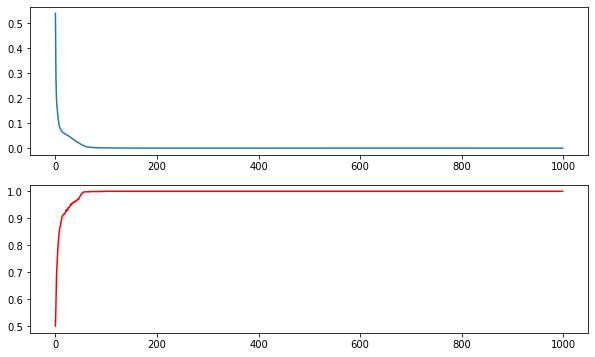

In [23]:
import pandas as pd
loss=hist.history['loss']
acc=hist.history['accuracy']
ax=plt.figure(figsize=(10,6))
p=ax.add_subplot(211)
p.plot(loss)
p=ax.add_subplot(212)
p.plot(acc,color='r')
df=pd.DataFrame(hist.history)
df.tail()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


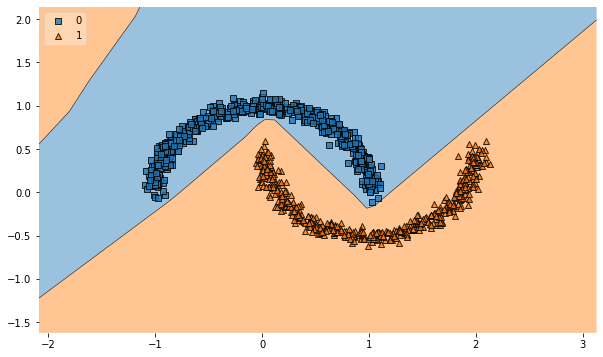

In [24]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y,clf=model_9,legend=2)
plt.show()

# Linear Classifier with three classes, and one output


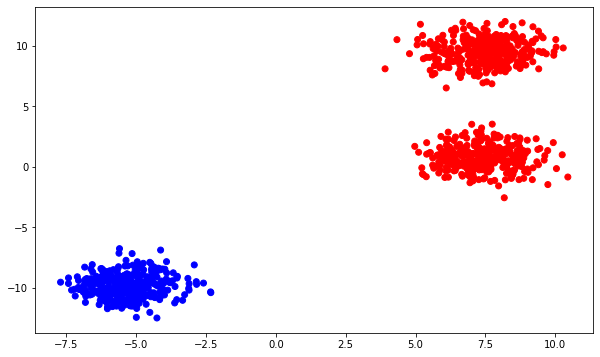

In [25]:
X,Y=datasets.make_blobs(n_samples=n_samples,random_state=8)
col=[c[int(i)] for i in Y]
plt.scatter(X[:,0],X[:,1],color=col)
plt.show()

In [26]:
class Onehot2int(object):
  def __init__(self,model):
    self.model=model
  def predict(self,X):
    y_pred=self.model.predict(X)
    return np.argmax(y_pred,axis=1)

In [27]:
from tensorflow.keras.utils import to_categorical
Y_ohe=to_categorical(Y)
model_4=keras.Sequential([
                          keras.layers.Dense(10,input_shape=(2,),activation='relu',kernel_initializer='he_uniform'),
                          keras.layers.Dense(8,activation='relu',kernel_initializer='he_uniform'),
                          keras.layers.Dense(3,activation='softmax')
])
model_4.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
hist=model_4.fit(X,Y_ohe,epochs=10,batch_size=5,verbose=1,validation_split=0.1)

Epoch 1/10
180/180 [==============================] - 0s 2ms/step - loss: 1.9929 - accuracy: 0.7456 - val_loss: 0.0623 - val_accuracy: 1.0000
Epoch 2/10
180/180 [==============================] - 0s 964us/step - loss: 0.0378 - accuracy: 1.0000 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 3/10
180/180 [==============================] - 0s 1ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 4/10
180/180 [==============================] - 0s 903us/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 5/10
180/180 [==============================] - 0s 954us/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 6/10
180/180 [==============================] - 0s 929us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 7/10
180/180 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.000

,loss,accuracy,val_loss,val_accuracy
5,0.003095,1.0,0.002234,1.0
6,0.002298,1.0,0.001712,1.0
7,0.001772,1.0,0.001355,1.0
8,0.001405,1.0,0.001092,1.0
9,0.001136,1.0,0.000900,1.0


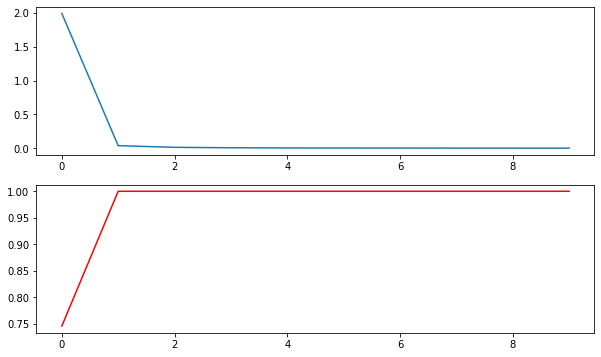

In [28]:
import pandas as pd
loss=hist.history['loss']
acc=hist.history['accuracy']
ax=plt.figure(figsize=(10,6))
p=ax.add_subplot(211)
p.plot(loss)
p=ax.add_subplot(212)
p.plot(acc,color='r')
df=pd.DataFrame(hist.history)
df.tail()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


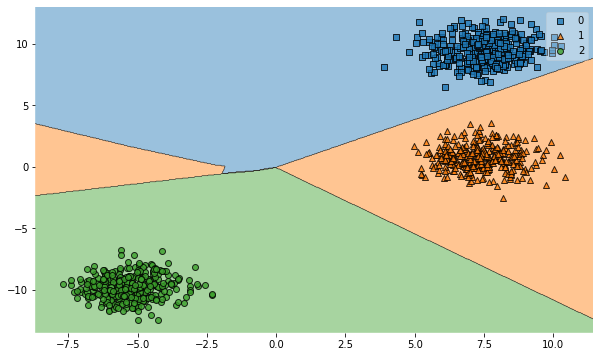

In [29]:
model_ohe=Onehot2int(model_4)
plot_decision_regions(X,Y,clf=model_ohe)
plt.show()

In [30]:
from tensorflow.keras.utils import to_categorical
Y_ohe=to_categorical(Y)
model_5=keras.Sequential([
                          keras.layers.Dense(10,input_shape=(2,),activation='relu',kernel_initializer='he_uniform'),
                          keras.layers.Dense(8,activation='relu',kernel_initializer='he_uniform'),
                          keras.layers.Dense(3,activation='softmax')
])
model_5.compile(optimizer='Adadelta',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
hist=model_5.fit(X,Y_ohe,epochs=1000,batch_size=8,verbose=1,validation_split=0.1)

Epoch 1/1000
113/113 [==============================] - 0s 2ms/step - loss: 3.7249 - accuracy: 0.3333 - val_loss: 3.5794 - val_accuracy: 0.3400
Epoch 2/1000
113/113 [==============================] - 0s 1ms/step - loss: 3.7037 - accuracy: 0.3333 - val_loss: 3.5594 - val_accuracy: 0.3400
Epoch 3/1000
113/113 [==============================] - 0s 1ms/step - loss: 3.6822 - accuracy: 0.3333 - val_loss: 3.5392 - val_accuracy: 0.3400
Epoch 4/1000
113/113 [==============================] - 0s 1ms/step - loss: 3.6607 - accuracy: 0.3333 - val_loss: 3.5188 - val_accuracy: 0.3400
Epoch 5/1000
113/113 [==============================] - 0s 1ms/step - loss: 3.6390 - accuracy: 0.3333 - val_loss: 3.4983 - val_accuracy: 0.3400
Epoch 6/1000
113/113 [==============================] - 0s 1ms/step - loss: 3.6170 - accuracy: 0.3333 - val_loss: 3.4775 - val_accuracy: 0.3400
Epoch 7/1000
113/113 [==============================] - 0s 1ms/step - loss: 3.5951 - accuracy: 0.3333 - val_loss: 3.4572 - val_accuracy:

,loss,accuracy,val_loss,val_accuracy
995,0.173378,1.0,0.184235,1.0
996,0.173026,1.0,0.183851,1.0
997,0.172671,1.0,0.183472,1.0
998,0.172319,1.0,0.183093,1.0
999,0.171967,1.0,0.182717,1.0


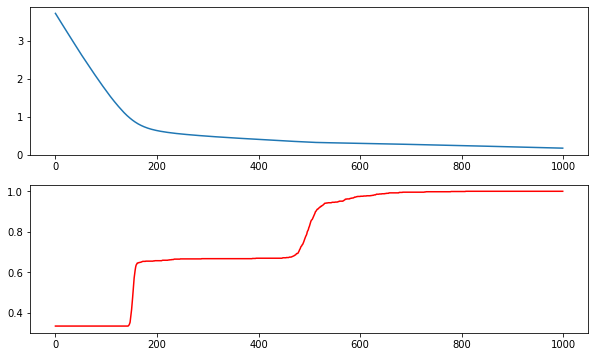

In [31]:
import pandas as pd
loss=hist.history['loss']
acc=hist.history['accuracy']
ax=plt.figure(figsize=(10,6))
p=ax.add_subplot(211)
p.plot(loss)
p=ax.add_subplot(212)
p.plot(acc,color='r')
df=pd.DataFrame(hist.history)
df.tail()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


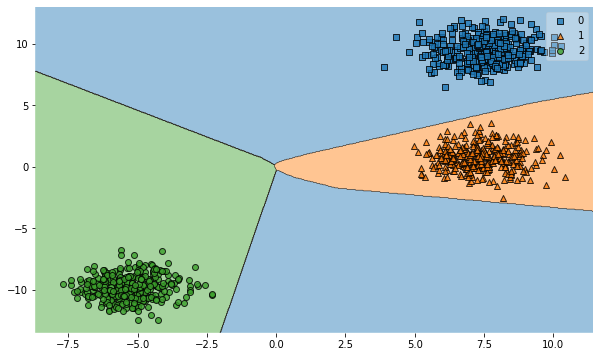

In [32]:
model_ohe=Onehot2int(model_5)
plot_decision_regions(X,Y,clf=model_ohe)
plt.show()

In [33]:
from tensorflow.keras.utils import to_categorical
Y_ohe=to_categorical(Y)
model_6=keras.Sequential([
                          keras.layers.Dense(10,input_shape=(2,),activation='relu',kernel_initializer='he_uniform'),
                          keras.layers.Dense(8,activation='relu',kernel_initializer='he_uniform'),
                          keras.layers.Dense(3,activation='softmax')
])
model_6.compile(optimizer='SGD',loss=tf.keras.losses.MeanSquaredError(),metrics=['accuracy'])
hist=model_6.fit(X,Y_ohe,epochs=2000,batch_size=8,verbose=1,validation_split=0.1)

Epoch 1/2000
113/113 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.6578 - val_loss: 0.2331 - val_accuracy: 0.6500
Epoch 2/2000
113/113 [==============================] - 0s 1ms/step - loss: 0.2229 - accuracy: 0.6667 - val_loss: 0.2320 - val_accuracy: 0.6500
Epoch 3/2000
113/113 [==============================] - 0s 1ms/step - loss: 0.2226 - accuracy: 0.6667 - val_loss: 0.2314 - val_accuracy: 0.6500
Epoch 4/2000
113/113 [==============================] - 0s 1ms/step - loss: 0.2225 - accuracy: 0.6667 - val_loss: 0.2310 - val_accuracy: 0.6500
Epoch 5/2000
113/113 [==============================] - 0s 1ms/step - loss: 0.2224 - accuracy: 0.6667 - val_loss: 0.2306 - val_accuracy: 0.6500
Epoch 6/2000
113/113 [==============================] - 0s 1ms/step - loss: 0.2224 - accuracy: 0.6667 - val_loss: 0.2303 - val_accuracy: 0.6500
Epoch 7/2000
113/113 [==============================] - 0s 1ms/step - loss: 0.2223 - accuracy: 0.6667 - val_loss: 0.2301 - val_accuracy:

,loss,accuracy,val_loss,val_accuracy
1995,0.222223,0.666667,0.226676,0.66
1996,0.222223,0.666667,0.226676,0.66
1997,0.222223,0.666667,0.226676,0.66
1998,0.222223,0.666667,0.226676,0.66
1999,0.222223,0.666667,0.226676,0.66


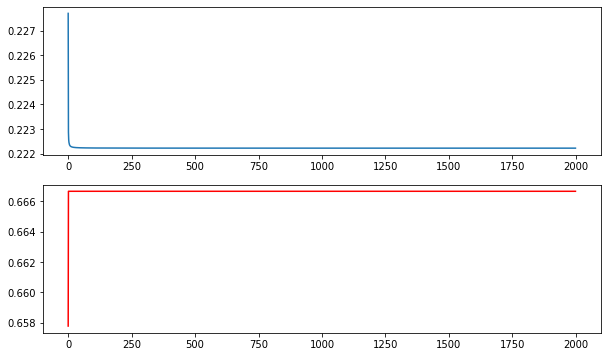

In [34]:
import pandas as pd
loss=hist.history['loss']
acc=hist.history['accuracy']
ax=plt.figure(figsize=(10,6))
p=ax.add_subplot(211)
p.plot(loss)
p=ax.add_subplot(212)
p.plot(acc,color='r')
df=pd.DataFrame(hist.history)
df.tail()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


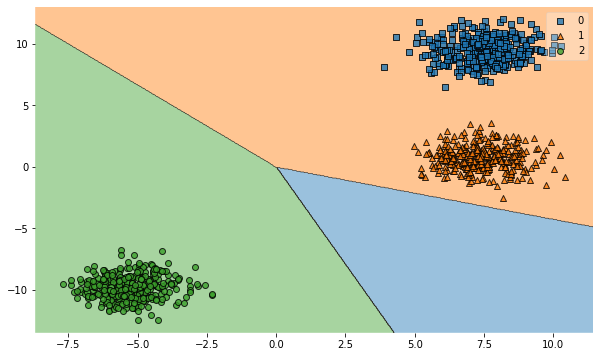

In [35]:
model_ohe=Onehot2int(model_6)
plot_decision_regions(X,Y,clf=model_ohe)
plt.show()

## Train neural networks to detect XOR gate output 

In [59]:
train_data=np.array([[0,0],[0,1],[1,0],[1,1]],'float32')
y=np.array([[0],[1],[1],[0]],'float32')
model=keras.Sequential()
model.add(keras.layers.Dense(16,input_dim=2,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])
hist=model.fit(train_data,y,epochs=500,verbose=1)
print(model.predict(train_data).round())

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2510 - binary_accuracy: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2507 - binary_accuracy: 0.2500
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2503 - binary_accuracy: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2500 - binary_accuracy: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2496 - binary_accuracy: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2493 - binary_accuracy: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2490 - binary_accuracy: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2487 - binary_accuracy: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2484 - binary_accuracy: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 2ms/step 

,loss,binary_accuracy
495,0.065040,1.0
496,0.064802,1.0
497,0.064552,1.0
498,0.064306,1.0
499,0.064067,1.0


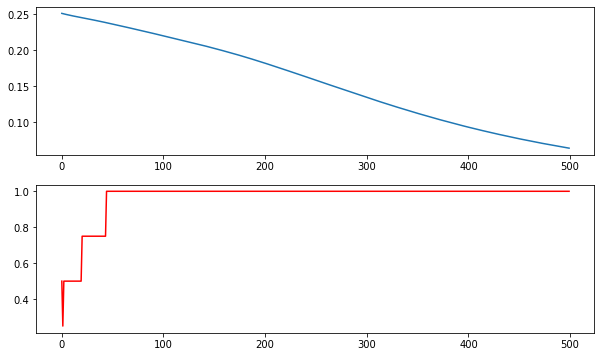

In [60]:
import pandas as pd
loss=hist.history['loss']
acc=hist.history['binary_accuracy']
ax=plt.figure(figsize=(10,6))
p=ax.add_subplot(211)
p.plot(loss)
p=ax.add_subplot(212)
p.plot(acc,color='r')
df=pd.DataFrame(hist.history)
df.tail()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


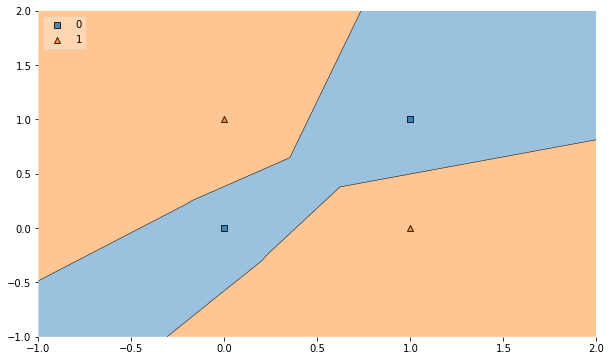

In [61]:
plot_decision_regions(train_data,y.astype(np.integer).reshape((4,)),clf=model,legend=2)
plt.show()

# Train neural networks to detect AND gate output

In [64]:
train_data=np.array([[0,0],[0,1],[1,0],[1,1]],'float32')
y=np.array([[0],[0],[0],[1]],'float32')
model1=keras.Sequential()
model1.add(keras.layers.Dense(10,input_dim=2,activation='tanh'))
model1.add(keras.layers.Dense(1,activation='sigmoid'))
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='rmsprop',
              metrics=['binary_accuracy'])
hist=model1.fit(train_data,y,epochs=500,verbose=1)
print(model1.predict(train_data).round())

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 0.7312 - binary_accuracy: 0.7500
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 0.7251 - binary_accuracy: 0.7500
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 0.7209 - binary_accuracy: 0.7500
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 0.7174 - binary_accuracy: 0.7500
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 0.7144 - binary_accuracy: 0.7500
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 0.7117 - binary_accuracy: 0.7500
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 0.7091 - binary_accuracy: 0.7500
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 0.7068 - binary_accuracy: 0.7500
Epoch 9/500
1/1 [==============================] - 0s 982us/step - loss: 0.7045 - binary_accuracy: 0.7500
Epoch 10/500
1/1 [==============================] - 0s 1ms/ste

,loss,binary_accuracy
495,0.163327,1.0
496,0.162662,1.0
497,0.161999,1.0
498,0.161337,1.0
499,0.160678,1.0


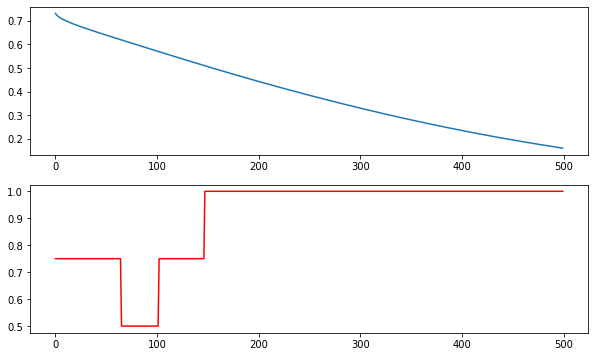

In [65]:
import pandas as pd
loss=hist.history['loss']
acc=hist.history['binary_accuracy']
ax=plt.figure(figsize=(10,6))
p=ax.add_subplot(211)
p.plot(loss)
p=ax.add_subplot(212)
p.plot(acc,color='r')
df=pd.DataFrame(hist.history)
df.tail()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


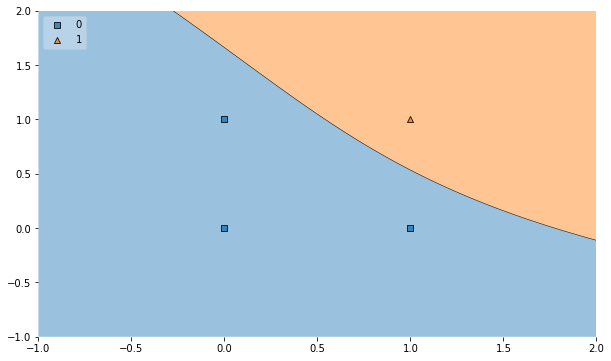

In [67]:
plot_decision_regions(train_data,y.astype(np.integer).reshape((4,)),clf=model1,legend=2)
plt.show()

# Train neural networks to detect the OR gate output

In [72]:
train_data=np.array([[0,0],[0,1],[1,0],[1,1]],'float32')
y=np.array([[0],[1],[1],[1]],'float32')
model2=keras.Sequential()
model2.add(keras.layers.Dense(15,input_dim=2,activation='relu'))
model2.add(keras.layers.Dense(1,activation='sigmoid'))
model2.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer='adam',
              metrics=['binary_accuracy'])
hist=model2.fit(train_data,y,epochs=1000,verbose=1)
print(model2.predict(train_data).round())

Epoch 1/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2402 - binary_accuracy: 0.7500
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2392 - binary_accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2383 - binary_accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2374 - binary_accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2365 - binary_accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2355 - binary_accuracy: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2346 - binary_accuracy: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2337 - binary_accuracy: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2328 - binary_accuracy: 0.5000
Epoch 10/1000
1/1 [==============================] - 0s

,loss,binary_accuracy
995,0.039593,1.0
996,0.039546,1.0
997,0.039500,1.0
998,0.039447,1.0
999,0.039399,1.0


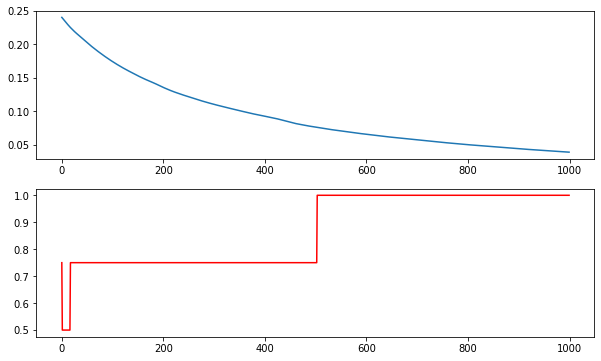

In [73]:
import pandas as pd
loss=hist.history['loss']
acc=hist.history['binary_accuracy']
ax=plt.figure(figsize=(10,6))
p=ax.add_subplot(211)
p.plot(loss)
p=ax.add_subplot(212)
p.plot(acc,color='r')
df=pd.DataFrame(hist.history)
df.tail()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


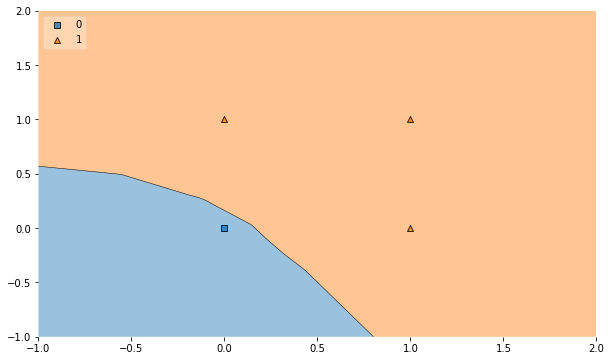

In [75]:
plot_decision_regions(train_data,y.astype(np.integer).reshape((4,)),clf=model2,legend=2)
plt.show()